cpu
Test Loss: 0.4934, Test Accuracy: 77.59%
[[26  0  0  4]
 [ 8 14  0  2]
 [ 0  2 27  6]
 [ 4  0  0 23]]


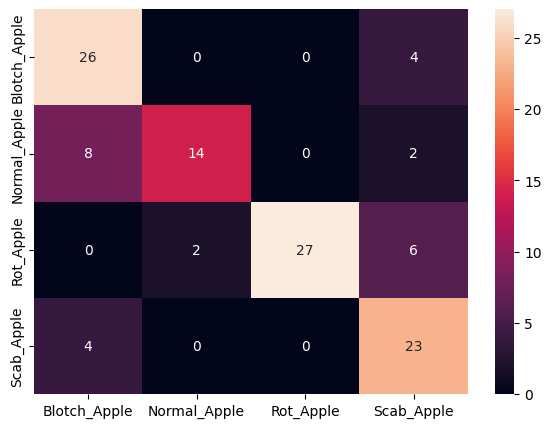

In [2]:
import torch
import torch.nn as nn
import torchvision.transforms as transforms
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from torchvision.models import resnet18

# device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
device = torch.device("cpu")
print(device)

num_classes = 4
image_size = 224
batch_size = 16
dropout = 0.5

# Resnet model
model = resnet18(pretrained=True)
num_features = model.fc.in_features
model.fc = nn.Linear(num_features, num_classes)
model = model.to(device)

model.load_state_dict(torch.load('./Resnet_Final_version_1.pth'))
model.eval()


# # model = CNNModel(num_classes, image_size, dropout)
# model = torch.load('./Team_Complate_Model_2.pth')
# model = model.to(device)
# # model.load_state_dict(torch.load('./Team_Weith_Model_1.pth'))
# model.eval()


# Define the transformations for test data before entering the neural network
transform_test = transforms.Compose([
    transforms.Resize((image_size, image_size)),                     # Resize images to 224x224 pixels
    transforms.ToTensor(),                                           # Convert images to tensors
    transforms.Normalize(mean=[0.5, 0.5, 0.5], std=[0.5, 0.5, 0.5])  # Normalize the images
])

# Load dataset path
test_dir = "./../Project 3/apple_disease_classification/Test_clean"

# Load the test dataset
test_dataset = ImageFolder(test_dir, transform=transform_test)

# Create DataLoader for managing the test data batches
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)


def test(model, criterion, test_loader, device):
    model.eval()
    correct = 0
    total = 0
    running_loss = 0.0

    with torch.no_grad():
        for inputs, labels in test_loader:
            inputs = inputs.to(device)
            labels = labels.to(device)

            outputs = model(inputs)
            loss = criterion(outputs, labels)

            _, predicted = torch.max(outputs.data, 1)
            total += labels.size(0)
            correct += (predicted == labels).sum().item()

            running_loss += loss.item()

    accuracy = 100.0 * correct / total
    return running_loss / len(test_loader), accuracy

criterion = nn.CrossEntropyLoss()

test_loss, test_accuracy = test(model, criterion, test_loader, device)
print(f'Test Loss: {test_loss:.4f}, Test Accuracy: {test_accuracy:.2f}%')

y_pred = []
y_true = []

# Iterate over test data
for inputs, labels in test_loader:
    inputs = inputs.to(device)
    labels = labels.to(device)
    output = model(inputs)  # Feed Network
    output = torch.argmax(torch.exp(output), dim=1).cpu().numpy()
    y_pred.extend(output)  # Save Prediction
    labels = labels.cpu().numpy()
    y_true.extend(labels)  # Save Truth

# Class labels
classes = ('0', '1', '2', '3')
test_dataset.class_to_idx
idx2class = {v: k for k, v in test_dataset.class_to_idx.items()}
idx2class

# Build confusion matrix
cf_matrix = confusion_matrix(y_true, y_pred)
print(cf_matrix)

confusion_matrix_df = pd.DataFrame(confusion_matrix(y_true, y_pred)).rename(columns=idx2class, index=idx2class)
# confusion_matrix_df = pd.DataFrame(cf_matrix, columns=idx2class, index=idx2class)
fig, ax = plt.subplots(figsize=(7, 5))
sns.heatmap(confusion_matrix_df, annot=True, ax=ax)
plt.show()
print(DataFrame)